https://github.com/jfh5580/STAT6289/tree/main/codes/NLP

## Magnitude

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!python --version

Python 3.7.16


In [3]:
from pymagnitude import *

Constructing a Magnitude Object

In [4]:
vectors = Magnitude('GoogleNews-vectors-negative300.magnitude')

In [5]:
vectors.distance("cat","dog")

0.69145405

### 1.What is the dimensionality of these word embeddings? Provide an integer answer.

In [6]:
dimensionality = vectors.dim
print(f"Dimensionality of word embeddings: {dimensionality}")

Dimensionality of word embeddings: 300


In this case, with a dimensionality of 300, each word is represented as a vector in a 300-dimensional space

### 2. What are the top-5 most similar words to picnic (not including picnic itself)?

In [17]:
query_word = 'picnic'
top_similar_words = vectors.most_similar(query_word, topn=5)

print(f"Top-5 most similar words to '{query_word}':")
for (word, similarity) in enumerate(top_similar_words[0:], 1):  # Exclude the first entry ('picnic' itself)
    print(f"{word}: {similarity}")

Top-5 most similar words to 'picnic':
1: ('picnics', 0.7400875)
2: ('picnic_lunch', 0.721374)
3: ('Picnic', 0.700534)
4: ('potluck_picnic', 0.6683274)
5: ('picnic_supper', 0.65189123)


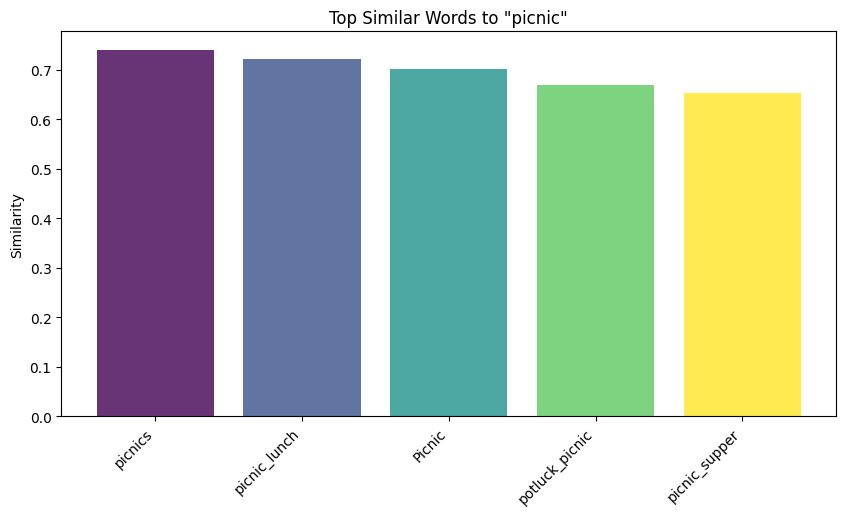

In [47]:
# Extract words and similarities
words = [word for word, _ in top_similar_words ]
similarities = [similarity for _, similarity in top_similar_words]

# Generate a range of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))

# Plotting
plt.figure(figsize=(10, 5))
bars = plt.bar(words, similarities, color=colors, alpha=0.8)

plt.ylabel('Similarity')
plt.title('Top Similar Words to "picnic"')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3. According to the word embeddings, which of these words is not like the others? ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']


In [29]:
# Question 3: Which word is not like the others?
words_to_compare = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']
doesnt_match_word = vectors.doesnt_match(words_to_compare)
print(f"The word not like the others: {doesnt_match_word}")

The word not like the others: tissue


### 4. Solve the following analogy: leg is to jump as X is to throw.


In [34]:
analogy_results = vectors.most_similar(positive=['leg', 'throw'], negative=['jump'])

print("Solutions to the analogy 'leg is to jump as X is to throw':")
for rank, (word, similarity) in enumerate(analogy_results, 1):
    print(f"{rank}. {word}: {similarity}")

Solutions to the analogy 'leg is to jump as X is to throw':
1. forearm: 0.482946515083313
2. shin: 0.473761647939682
3. elbow: 0.4679689109325409
4. metacarpal_bone: 0.46781474351882935
5. metacarpal_bones: 0.46605822443962097
6. ankle: 0.4643442630767822
7. shoulder: 0.46183353662490845
8. thigh: 0.4539368152618408
9. knee: 0.445570707321167
10. ulna_bone: 0.4423491060733795


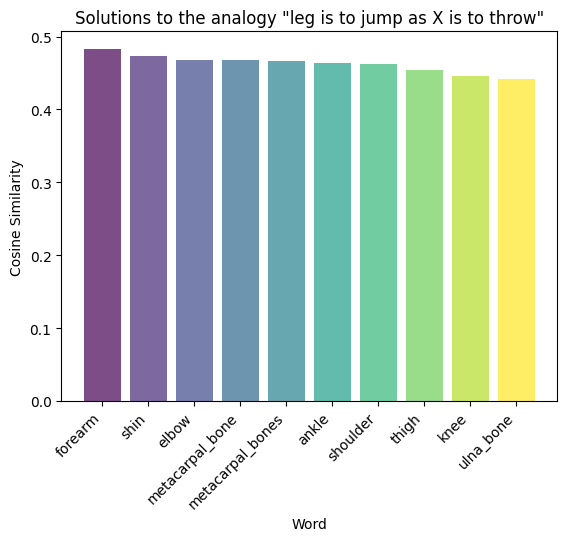

In [46]:
# Extract words and similarities
words = [word for rank, (word, similarity) in enumerate(analogy_results, 1)]
similarities = [similarity for rank, (word, similarity) in enumerate(analogy_results, 1)]

# Generate a range of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(analogy_results)))

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(range(1, len(analogy_results) + 1), similarities, tick_label=words, color=colors, alpha=0.7)


ax.set_title('Solutions to the analogy "leg is to jump as X is to throw"')
ax.set_xlabel('Word')
ax.set_ylabel('Cosine Similarity')
plt.xticks(rotation=45, ha='right')
plt.show()

## Different methods - gensim - Word2Vec

In [51]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [58]:
# Load the pre-trained Word2Vec model (Google News vectors)
word2vec_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [59]:
# 1. What is the dimensionality of these word embeddings? Provide an integer answer.
dimensionality = word2vec_model.vector_size
print(f"Dimensionality of word embeddings: {dimensionality}")

# 2. What are the top-5 most similar words to 'picnic' (not including 'picnic' itself)?
top_similar_words = word2vec_model.most_similar('picnic', topn=5)
print(f"Top-5 most similar words to 'picnic': {[word for word, _ in top_similar_words]}")

# 3. According to the word embeddings, which of these words is not like the others?
words_to_compare = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']
odd_one_out = word2vec_model.doesnt_match(words_to_compare)
print(f"The word not like the others: {odd_one_out}")

# 4. Solve the following analogy: leg is to jump as X is to throw.
analogy_results = word2vec_model.most_similar(positive=['leg', 'throw'], negative=['jump'])
print("Solutions to the analogy 'leg is to jump as X is to throw':")
for rank, (word, similarity) in enumerate(analogy_results, 1):
    print(f"{rank}. {word}: {similarity}")

Dimensionality of word embeddings: 300
Top-5 most similar words to 'picnic': ['picnics', 'picnic_lunch', 'Picnic', 'potluck_picnic', 'picnic_supper']
The word not like the others: tissue
Solutions to the analogy 'leg is to jump as X is to throw':
1. forearm: 0.4829465448856354
2. shin: 0.4737616777420044
3. elbow: 0.4679689109325409
4. metacarpal_bone: 0.46781474351882935
5. metacarpal_bones: 0.4660581946372986
6. ankle: 0.4643442928791046
7. shoulder: 0.46183353662490845
8. thigh: 0.4539368748664856
9. knee: 0.445570707321167
10. ulna_bone: 0.44234907627105713
